Package Installation

In [1]:
# Install Pandas package

!pip install pandas
import pandas as pd

!pip install --upgrade scikit-learn


Read the dataset

In [2]:
df_bangalore = pd.read_excel("/content/bangalore_cars.xlsx")
df_chennai  = pd.read_excel("/content/chennai_cars.xlsx")
df_delhi  = pd.read_excel("/content/delhi_cars.xlsx")
df_hyd  = pd.read_excel("/content/hyderabad_cars.xlsx")
df_jaipur  = pd.read_excel("/content/jaipur_cars.xlsx")
df_kolkata  = pd.read_excel("/content/kolkata_cars.xlsx")

In [3]:
df_bangalore['City'] = 'Bangalore'
df_chennai['City'] = 'Chennai'
df_delhi['City'] = 'Delhi'
df_hyd['City'] = 'Hyderabad'
df_jaipur['City'] = 'Jaipur'
df_kolkata['City'] = 'Kolkata'

In [4]:
merged_df = pd.concat([df_bangalore, df_chennai, df_delhi, df_hyd, df_jaipur, df_kolkata], ignore_index=True)

In [5]:
df = merged_df.drop('car_links', axis=1)

In [6]:
df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,City
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Bangalore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Bangalore
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Bangalore
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Bangalore
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Bangalore
...,...,...,...,...,...
8364,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Kolkata
8365,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Kolkata
8366,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Kolkata
8367,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Kolkata


In [7]:
import pandas as pd
import ast

# Helper function to safely merge DataFrames with overlapping columns
def safe_concat(df, new_df, prefix):
    overlapping_columns = [col for col in new_df.columns if col in df.columns]
    if overlapping_columns:
        df.drop(columns=overlapping_columns, inplace=True)
    new_df.columns = [f"{prefix}_{col}" if col in df.columns else col for col in new_df.columns]
    return pd.concat([df, new_df], axis=1)

# Column 1: Process 'new_car_detail'
df["new_car_detail"] = df["new_car_detail"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
def extract_values(d):
    if isinstance(d, dict):
        return pd.Series(d)
    return pd.Series()
new_car_details_df = df["new_car_detail"].apply(extract_values)
df = safe_concat(df, new_car_details_df, 'detail')
df.drop(columns=["new_car_detail"], inplace=True)

# Column 2: Process 'new_car_overview'
df["new_car_overview"] = df["new_car_overview"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_top_values(row):
    new_dict = {}
    if isinstance(row, dict) and "top" in row and isinstance(row["top"], list):
        for item in row["top"]:
            if isinstance(item, dict) and "key" in item and "value" in item:
                new_dict[item["key"]] = item["value"]
    return pd.Series(new_dict)
new_car_overview_df = df["new_car_overview"].apply(extract_top_values)
df = safe_concat(df, new_car_overview_df, 'overview')
df.drop(columns=["new_car_overview"], inplace=True)

# Column 3: Process 'new_car_feature'
df["new_car_feature"] = df["new_car_feature"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_features(row):
    features = []
    if isinstance(row, dict):
        if "top" in row and isinstance(row["top"], list):
            for item in row["top"]:
                if isinstance(item, dict) and "value" in item:
                    features.append(str(item["value"]))
        if "data" in row and isinstance(row["data"], list):
            for category in row["data"]:
                if isinstance(category, dict) and "list" in category and isinstance(category["list"], list):
                    for item in category["list"]:
                        if isinstance(item, dict) and "value" in item:
                            features.append(str(item["value"]))
    return ", ".join(features)
df["Feature"] = df["new_car_feature"].apply(extract_features)
df.drop(columns=["new_car_feature"], inplace=True)

# Column 4: Process 'new_car_specs'
def expand_specs(row):
    specs = ast.literal_eval(row)
    expanded_data = {}
    for item in specs['top']:
        key = item['key']
        value = item['value']
        expanded_data[key] = value
    for section in specs['data']:
        for item in section['list']:
            key = item['key']
            value = item['value']
            expanded_data[key] = value
    return pd.Series(expanded_data)
expanded_specs_df = df['new_car_specs'].apply(expand_specs)
df = safe_concat(df, expanded_specs_df, 'specs')
df.drop(columns=['new_car_specs'], inplace=True)

# Save the DataFrame to a CSV file
csv_file_path = 'Merged_file.csv'
df.to_csv(csv_file_path, index=False)

print(f"Excel file has been successfully converted to CSV and saved as '{csv_file_path}'.")


Excel file has been successfully converted to CSV and saved as 'Merged_file.csv'.


In [8]:
df_merged  = pd.read_csv("/content/Merged_file.csv")
df_merged

<ipython-input-8-5943559142cb>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged  = pd.read_csv("/content/Merged_file.csv")


,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,Bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN
1,Bangalore,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN
2,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN
3,Bangalore,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN
4,Bangalore,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless, Radial",5.0,313,NaN,NaN,NaN
8365,Kolkata,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,...,Solid Disc,Drum,140 kmph,19 Seconds,Tubeless Tyres,5.0,177-litres,NaN,NaN,NaN
8366,Kolkata,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,Ventilated Disc,Solid Disc,230km/hr,8.8 Seconds,"Tubeless,Radial",4.0,475-litres,17,17,NaN
8367,Kolkata,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,...,Ventilated Disc,Drum,156 Kmph,15 Seconds,"Tubeless,Radial",5.0,236-liters,14,14,NaN


In [9]:
df_merged = df_merged.drop(['it', 'owner', 'centralVariantId', 'variantName', 'priceActual', 'priceSaving', 'priceFixedText', 'trendingText', 'Registration Year', 'Fuel Type', 'Kms Driven', 'RTO', 'Ownership', 'Year of Manufacture', 'Feature', 'Engine', 'Engine Type', 'Displacement', 'Max Torque', 'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio', 'Turning Radius', 'Wheel Size', 'Alloy Wheel Size', 'Ground Clearance Unladen'], axis=1)

In [10]:
df_merged.isnull().sum()

,0
City,0
ft,0
bt,4
km,0
transmission,0
ownerNo,0
oem,0
model,0
modelYear,0
price,0


In [11]:
df_merged = df_merged.rename(columns = {'ft': 'Fuel Type', 'bt': 'Body Type', 'oem': 'Manufacturer'})

In [12]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 8369 non-null   object 
 1   Fuel Type            8369 non-null   object 
 2   Body Type            8365 non-null   object 
 3   km                   8369 non-null   object 
 4   transmission         8369 non-null   object 
 5   ownerNo              8369 non-null   int64  
 6   Manufacturer         8369 non-null   object 
 7   model                8369 non-null   object 
 8   modelYear            8369 non-null   int64  
 9   price                8369 non-null   object 
 10  Insurance Validity   8365 non-null   object 
 11  Engine Displacement  8365 non-null   object 
 12  Transmission         8369 non-null   object 
 13  Mileage              8082 non-null   object 
 14  Max Power            8309 non-null   object 
 15  Torque               8309 non-null   o

In [13]:
df = df_merged[['City', 'Fuel Type', 'Body Type', 'km', 'price', 'transmission', 'ownerNo', 'Manufacturer', 'model', 'modelYear', 'Insurance Validity', 'Engine Displacement', 'Transmission', 'Mileage', 'Seats', 'Color', 'No of Cylinder', 'Gear Box', 'Drive Type', 'Seating Capacity', 'Steering Type', 'Tyre Type', 'No Door Numbers']]
df

,City,Fuel Type,Body Type,km,price,transmission,ownerNo,Manufacturer,model,modelYear,...,Mileage,Seats,Color,No of Cylinder,Gear Box,Drive Type,Seating Capacity,Steering Type,Tyre Type,No Door Numbers
0,Bangalore,Petrol,Hatchback,"1,20,000",₹ 4 Lakh,Manual,3,Maruti,Maruti Celerio,2015,...,23.1 kmpl,5.0,White,3.0,5 Speed,FWD,5.0,Power,"Tubeless, Radial",5.0
1,Bangalore,Petrol,SUV,"32,706",₹ 8.11 Lakh,Manual,2,Ford,Ford Ecosport,2018,...,17 kmpl,5.0,White,3.0,5 Speed,FWD,5.0,Power,"Tubeless,Radial",4.0
2,Bangalore,Petrol,Hatchback,"11,949",₹ 5.85 Lakh,Manual,1,Tata,Tata Tiago,2018,...,23.84 kmpl,5.0,Red,3.0,5 Speed,FWD,5.0,Power,Tubeless,5.0
3,Bangalore,Petrol,Sedan,"17,794",₹ 4.62 Lakh,Manual,1,Hyundai,Hyundai Xcent,2014,...,19.1 kmpl,5.0,Others,4.0,5 Speed,FWD,5.0,Power,"Tubeless,Radial",4.0
4,Bangalore,Diesel,SUV,"60,000",₹ 7.90 Lakh,Manual,1,Maruti,Maruti SX4 S Cross,2015,...,23.65 kmpl,5.0,Gray,4.0,5 Speed,FWD,5.0,Power,"Tubeless,Radial",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,Petrol,Hatchback,"10,000",₹ 5.10 Lakh,Manual,1,Maruti,Maruti Celerio,2022,...,25.24 kmpl,5.0,Others,3.0,5-Speed,NaN,5.0,Electric,"Tubeless, Radial",5.0
8365,Kolkata,Petrol,Hatchback,"1,20,000",₹ 1.80 Lakh,Manual,1,Maruti,Maruti Alto 800,2014,...,22.74 kmpl,5.0,Others,3.0,5 Speed,FWD,5.0,Power,Tubeless Tyres,5.0
8366,Kolkata,Petrol,Sedan,"50,000",₹ 5.50 Lakh,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,11.74 kmpl,5.0,Others,4.0,7 Speed,RWD,5.0,Power,"Tubeless,Radial",4.0
8367,Kolkata,Petrol,Hatchback,"40,000",₹ 1.40 Lakh,Manual,1,Maruti,Maruti Ritz,2012,...,18.5 kmpl,5.0,Others,4.0,5 Speed,FWD,5.0,Power,"Tubeless,Radial",5.0


Data Type Conversion & Standardising Data Formats

In [14]:
# Kilometer

df['km'] = df['km'].str.replace(',', '', regex=True).astype(int)

# Price

df['price'] = df['price'].str.replace('₹', '', regex=True).str.strip()

# Model Year

df['modelYear'] = pd.to_datetime(df['modelYear'])

<ipython-input-14-1bce3a2ca5de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['km'] = df['km'].str.replace(',', '', regex=True).astype(int)
<ipython-input-14-1bce3a2ca5de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace('₹', '', regex=True).str.strip()
<ipython-input-14-1bce3a2ca5de>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [15]:
# Converting the Lakhs and Crores to numerical format.

# Function to convert price to numeric
def convert_price(value):
    value = value.replace(',', '').strip()  # Remove commas & spaces

    if 'Lakh' in value:
        return float(value.replace('Lakh', '').strip()) * 100000  # Convert Lakh to number
    elif 'Crore' in value:
        return float(value.replace('Crore', '').strip()) * 10000000  # Convert Crore to number
    else:
        return float(value)  # Convert normal numbers

# Apply function
df['price'] = df['price'].apply(convert_price)

# Convert to integer if needed
df['price'] = df['price'].astype(int)

<ipython-input-15-a6048ba51dfb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].apply(convert_price)
<ipython-input-15-a6048ba51dfb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(int)


In [16]:
df

,City,Fuel Type,Body Type,km,price,transmission,ownerNo,Manufacturer,model,modelYear,...,Mileage,Seats,Color,No of Cylinder,Gear Box,Drive Type,Seating Capacity,Steering Type,Tyre Type,No Door Numbers
0,Bangalore,Petrol,Hatchback,120000,400000,Manual,3,Maruti,Maruti Celerio,1970-01-01 00:00:00.000002015,...,23.1 kmpl,5.0,White,3.0,5 Speed,FWD,5.0,Power,"Tubeless, Radial",5.0
1,Bangalore,Petrol,SUV,32706,811000,Manual,2,Ford,Ford Ecosport,1970-01-01 00:00:00.000002018,...,17 kmpl,5.0,White,3.0,5 Speed,FWD,5.0,Power,"Tubeless,Radial",4.0
2,Bangalore,Petrol,Hatchback,11949,585000,Manual,1,Tata,Tata Tiago,1970-01-01 00:00:00.000002018,...,23.84 kmpl,5.0,Red,3.0,5 Speed,FWD,5.0,Power,Tubeless,5.0
3,Bangalore,Petrol,Sedan,17794,462000,Manual,1,Hyundai,Hyundai Xcent,1970-01-01 00:00:00.000002014,...,19.1 kmpl,5.0,Others,4.0,5 Speed,FWD,5.0,Power,"Tubeless,Radial",4.0
4,Bangalore,Diesel,SUV,60000,790000,Manual,1,Maruti,Maruti SX4 S Cross,1970-01-01 00:00:00.000002015,...,23.65 kmpl,5.0,Gray,4.0,5 Speed,FWD,5.0,Power,"Tubeless,Radial",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,Petrol,Hatchback,10000,509999,Manual,1,Maruti,Maruti Celerio,1970-01-01 00:00:00.000002022,...,25.24 kmpl,5.0,Others,3.0,5-Speed,NaN,5.0,Electric,"Tubeless, Radial",5.0
8365,Kolkata,Petrol,Hatchback,120000,180000,Manual,1,Maruti,Maruti Alto 800,1970-01-01 00:00:00.000002014,...,22.74 kmpl,5.0,Others,3.0,5 Speed,FWD,5.0,Power,Tubeless Tyres,5.0
8366,Kolkata,Petrol,Sedan,50000,550000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,1970-01-01 00:00:00.000002011,...,11.74 kmpl,5.0,Others,4.0,7 Speed,RWD,5.0,Power,"Tubeless,Radial",4.0
8367,Kolkata,Petrol,Hatchback,40000,140000,Manual,1,Maruti,Maruti Ritz,1970-01-01 00:00:00.000002012,...,18.5 kmpl,5.0,Others,4.0,5 Speed,FWD,5.0,Power,"Tubeless,Radial",5.0


In [17]:
# Engine Displacement

df['Engine Displacement'] = df['Engine Displacement'].str.replace(' cc', '', regex=False).astype(float)

<ipython-input-17-7de5a34cf87a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine Displacement'] = df['Engine Displacement'].str.replace(' cc', '', regex=False).astype(float)


In [18]:
# Mileage

df['Mileage'] = df['Mileage'].str.replace(' kmpl', '', regex=False).str.replace(' km/kg', '', regex=False).astype(float)

<ipython-input-18-684a214071ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = df['Mileage'].str.replace(' kmpl', '', regex=False).str.replace(' km/kg', '', regex=False).astype(float)


Missing Value Treatment

In [19]:
# Filling the missing values of "Body Type" column with mode technique

df['Body Type'] = df['Body Type'].fillna('Hatchback')

<ipython-input-19-a965f13d2bcc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Body Type'] = df['Body Type'].fillna('Hatchback')


In [20]:
# Filling the missing values of "Insurance Validity" column with mode technique

df['Insurance Validity'] = df['Insurance Validity'].fillna('Third Party insurance')

<ipython-input-20-258f05f67adc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Insurance Validity'] = df['Insurance Validity'].fillna('Third Party insurance')


In [21]:
# Filling the null values using mode technique

df['Seats'] = df['Seats'].fillna(5.0)

# Changing the datatype to int

df['Seats'] = df['Seats'].astype('int')

<ipython-input-21-eb575bf99757>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seats'] = df['Seats'].fillna(5.0)
<ipython-input-21-eb575bf99757>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seats'] = df['Seats'].astype('int')


In [22]:
# Filling the null values of 'Engine Displacement" column using mode technique

df['Engine Displacement'] = df['Engine Displacement'].fillna(1197.0)

<ipython-input-22-c561cbadd5d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine Displacement'] = df['Engine Displacement'].fillna(1197.0)


In [23]:
# Filling the null values of 'Color" column using mode technique

df['Color'] = df['Color'].fillna('Others')

# Changing the color "other" to "Dark Black"

df['Color'] = df['Color'].replace('Others', 'Dark Black')

<ipython-input-23-3ca23e67d327>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Color'] = df['Color'].fillna('Others')
<ipython-input-23-3ca23e67d327>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Color'] = df['Color'].replace('Others', 'Dark Black')


In [24]:
# Filling the null values using mode technique

df['No of Cylinder'] = df['No of Cylinder'].fillna(4.0)

# Changing the datatype to int

df['No of Cylinder'] = df['No of Cylinder'].astype('int')

<ipython-input-24-e4301feaa4ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No of Cylinder'] = df['No of Cylinder'].fillna(4.0)
<ipython-input-24-e4301feaa4ad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No of Cylinder'] = df['No of Cylinder'].astype('int')


In [25]:
# Filling the null values using mode technique

df['Seating Capacity'] = df['Seating Capacity'].fillna(5.0)

# Changing the datatype to int

df['Seating Capacity'] = df['Seating Capacity'].astype('int')

<ipython-input-25-1b2efa6f2b80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seating Capacity'] = df['Seating Capacity'].fillna(5.0)
<ipython-input-25-1b2efa6f2b80>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seating Capacity'] = df['Seating Capacity'].astype('int')


In [26]:
# Filling the null values using mode technique

df['No Door Numbers'] = df['No Door Numbers'].fillna(5.0)

# Changing the datatype to int

df['No Door Numbers'] = df['No Door Numbers'].astype('int')

<ipython-input-26-ab6eabff7675>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No Door Numbers'] = df['No Door Numbers'].fillna(5.0)
<ipython-input-26-ab6eabff7675>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No Door Numbers'] = df['No Door Numbers'].astype('int')


In [27]:
# Filling the null values of 'Steering Type" column using mode technique

df['Steering Type'] = df['Steering Type'].fillna('Power')

<ipython-input-27-8d1c127a147d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Steering Type'] = df['Steering Type'].fillna('Power')


In [28]:
# Filling the null values using mode technique

df['Mileage'] = df['Mileage'].fillna(18.900)

<ipython-input-28-5653efc0cf61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = df['Mileage'].fillna(18.900)


In [29]:
# Filling the null values using mode technique

df['Drive Type'] = df['Drive Type'].fillna('FWD')

<ipython-input-29-80ea33464cb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drive Type'] = df['Drive Type'].fillna('FWD')


In [30]:
df['Year'] = df['modelYear'].dt.year

<ipython-input-30-633116a8fb85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['modelYear'].dt.year


In [31]:
df = df.drop(['Tyre Type', 'Gear Box', 'transmission', 'Seating Capacity', 'modelYear', 'model', 'Color'], axis=1)

In [32]:
df.isnull().sum().sum()

0

EDA (Visualization)

In [33]:
# Missingno package installation

!pip install missingno
import missingno as msno

# Matplotlib package installation

!pip install matplotlib
import matplotlib.pyplot as plt

# Seaborn package installation

!pip install seaborn
import seaborn as sns

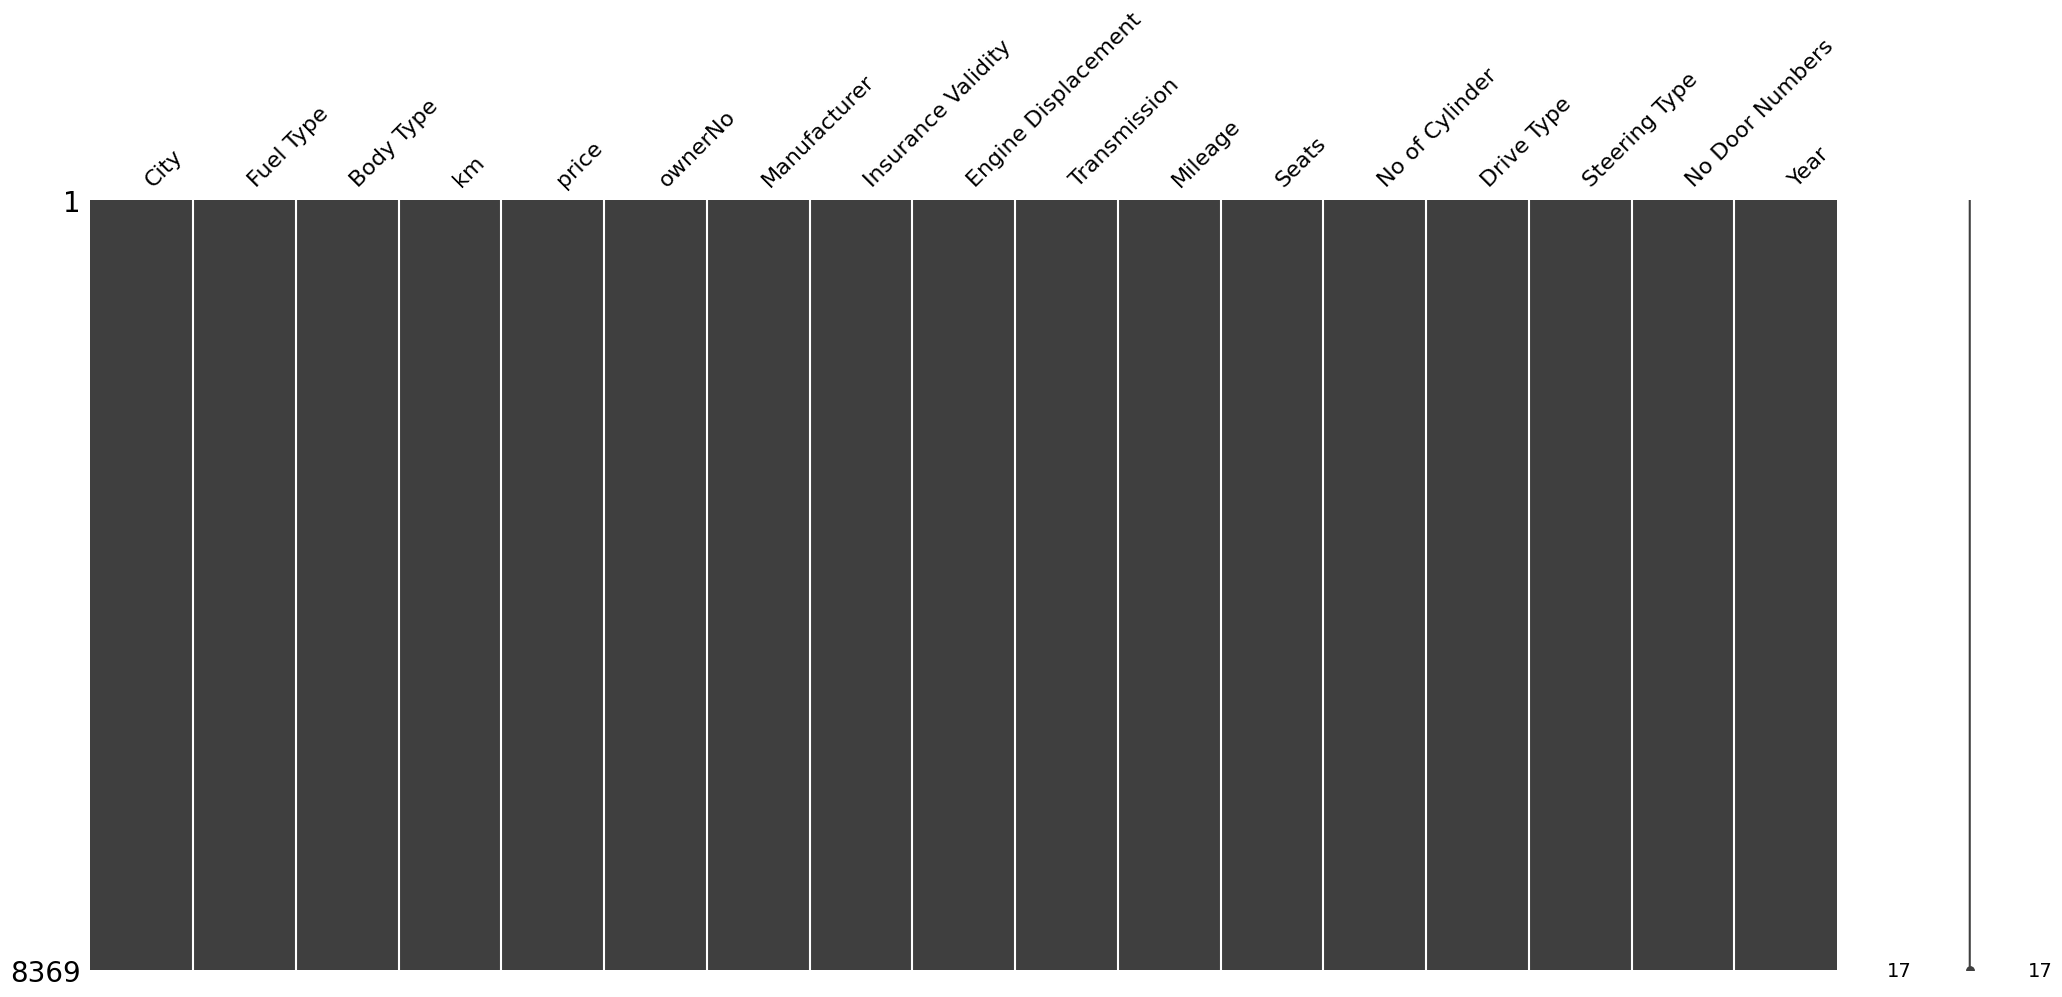

In [34]:
msno.matrix(df)
plt.show()

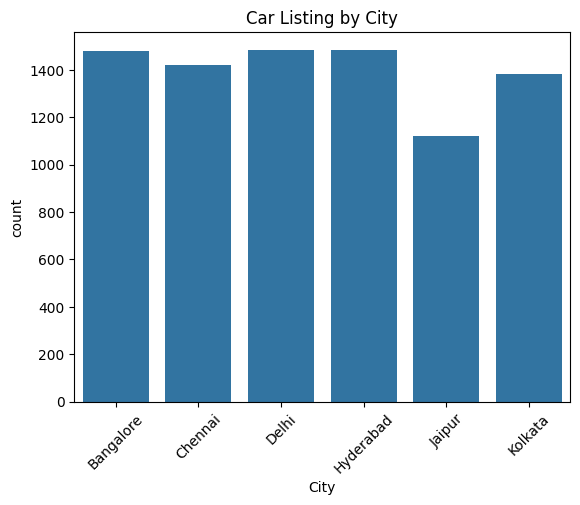

In [35]:
# Car distribution by City

sns.countplot(x='City', data=df)
plt.title('Car Listing by City')
plt.xticks(rotation=45)
plt.show()

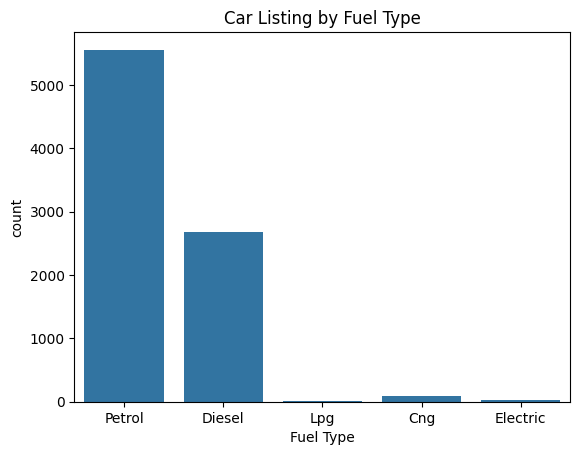

In [36]:
# Fuel Type Distribution

sns.countplot(x='Fuel Type', data=df)
plt.title('Car Listing by Fuel Type')
plt.show()

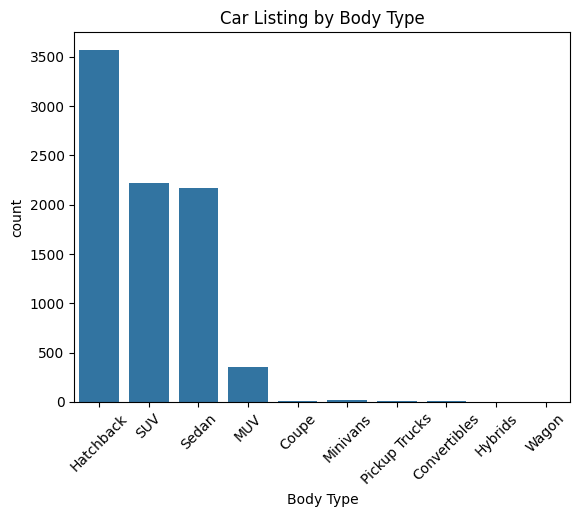

In [37]:
# Body Type Distribution

sns.countplot(x='Body Type', data=df)
plt.title('Car Listing by Body Type')
plt.xticks(rotation=45)
plt.show()


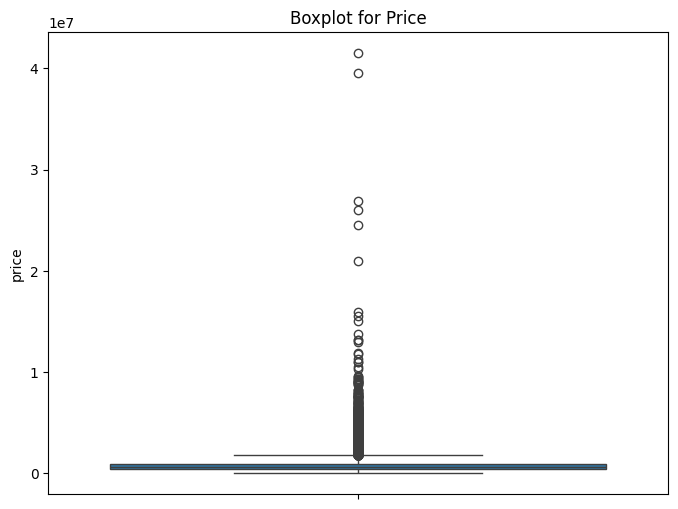

In [38]:
# Boxplot for 'price' to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price'])
plt.title('Boxplot for Price')
plt.show()

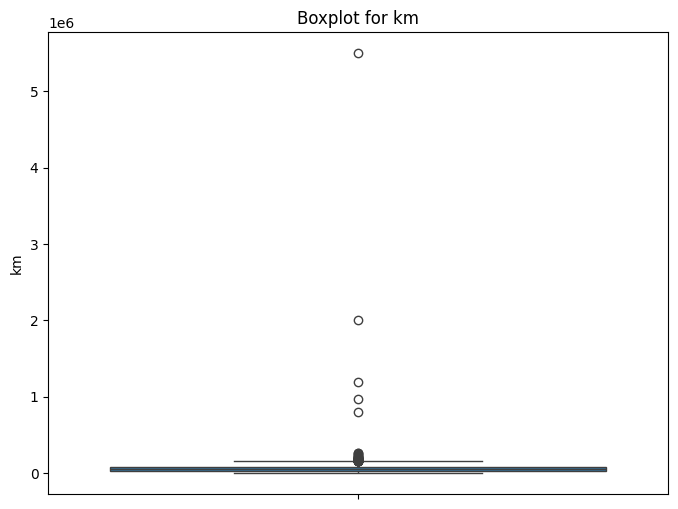

In [39]:
# Boxplot for 'price' to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['km'])
plt.title('Boxplot for km')
plt.show()

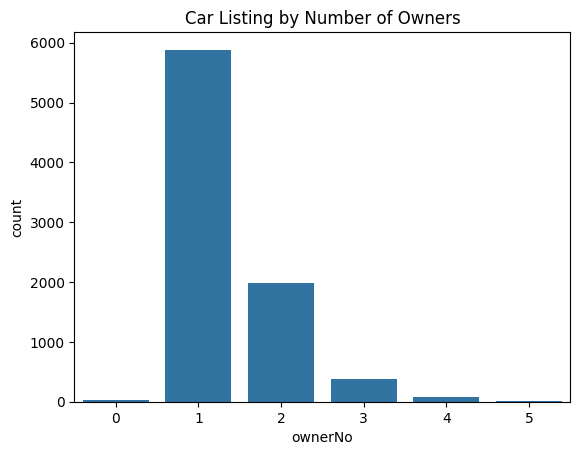

In [40]:
# Number of owner distribution

sns.countplot(x='ownerNo', data=df)
plt.title('Car Listing by Number of Owners')
plt.show()


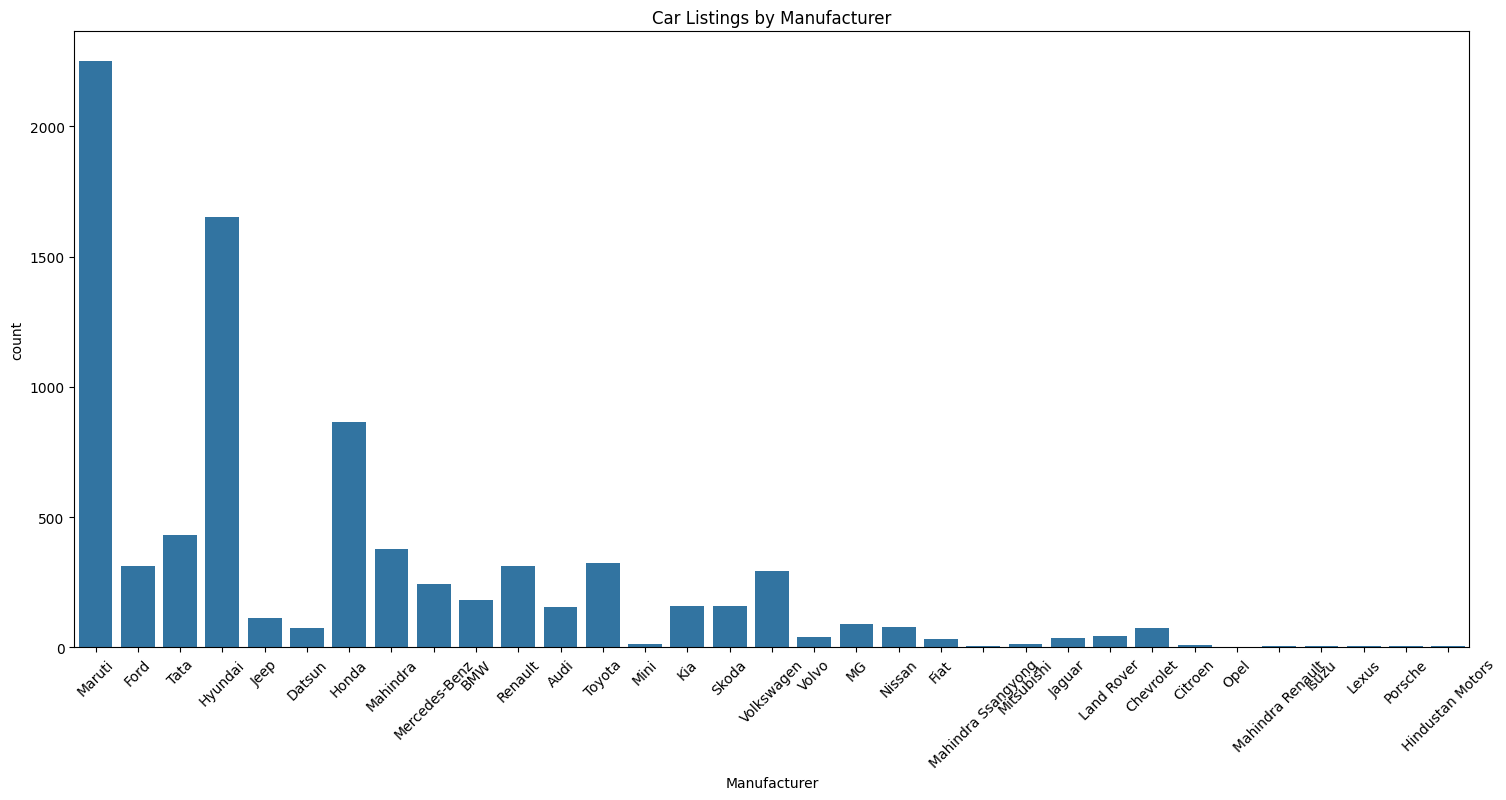

In [41]:
# Brand Distribution

plt.figure(figsize=(18, 8))
sns.countplot(x='Manufacturer', data=df)
plt.title('Car Listings by Manufacturer')
plt.xticks(rotation=45)
plt.show()


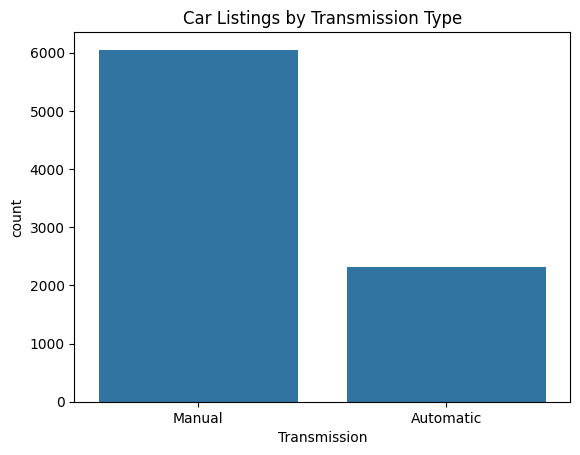

In [42]:
# Transmission Distribution

sns.countplot(x='Transmission', data=df)
plt.title('Car Listings by Transmission Type')
plt.show()


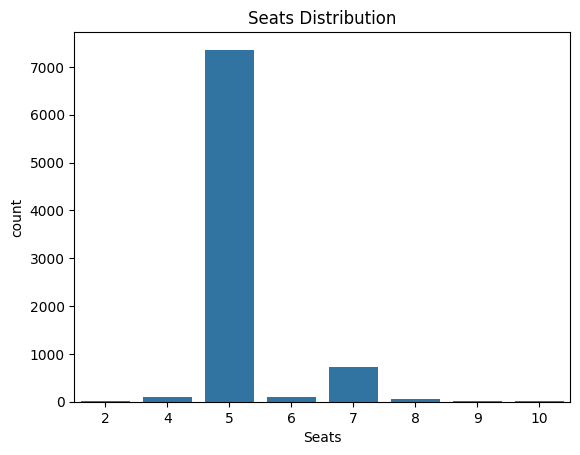

In [43]:
# Seat Distribution

sns.countplot(x='Seats', data=df)
plt.title('Seats Distribution')
plt.show()


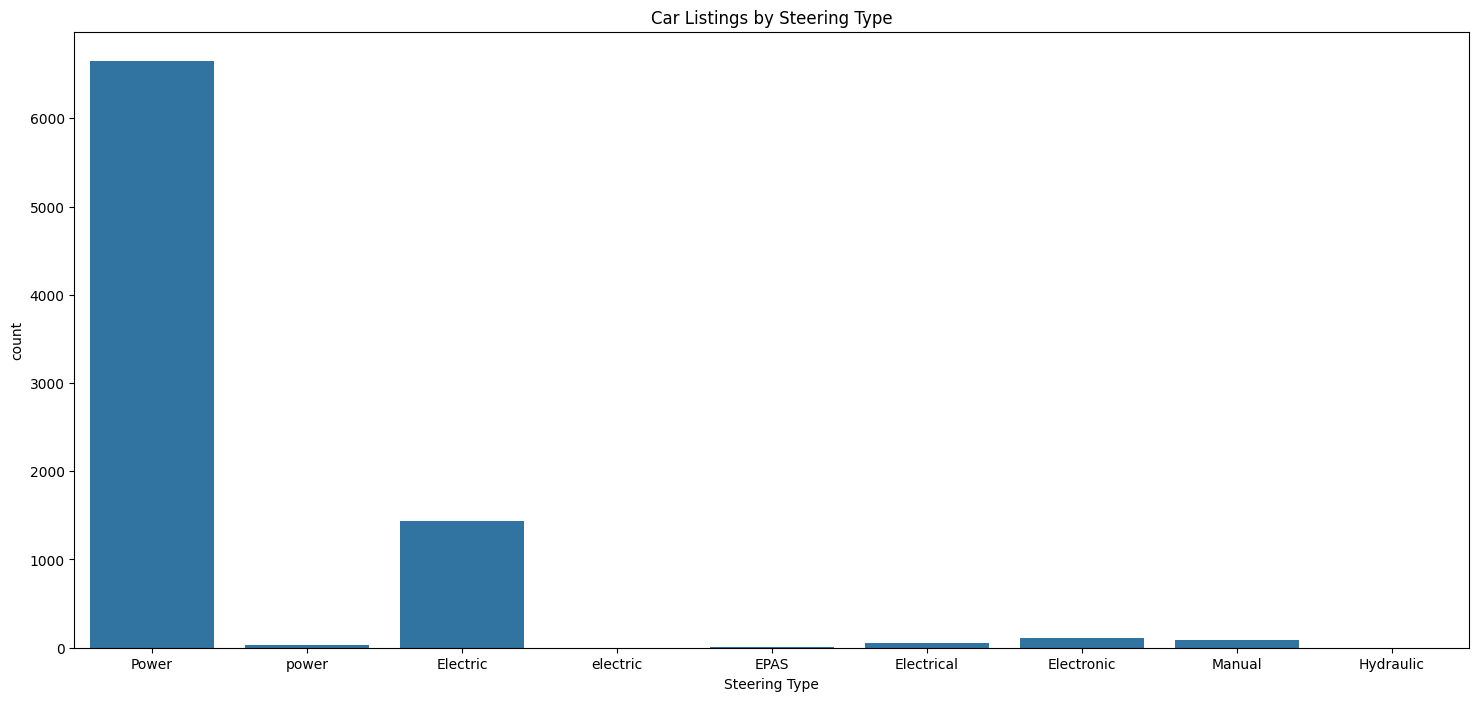

In [44]:
# Steering Type Distribution

plt.figure(figsize=(18, 8))
sns.countplot(x='Steering Type', data=df)
plt.title('Car Listings by Steering Type')
plt.show()


In [45]:
df.columns

Index(['City', 'Fuel Type', 'Body Type', 'km', 'price', 'ownerNo',
       'Manufacturer', 'Insurance Validity', 'Engine Displacement',
       'Transmission', 'Mileage', 'Seats', 'No of Cylinder', 'Drive Type',
       'Steering Type', 'No Door Numbers', 'Year'],
      dtype='object')

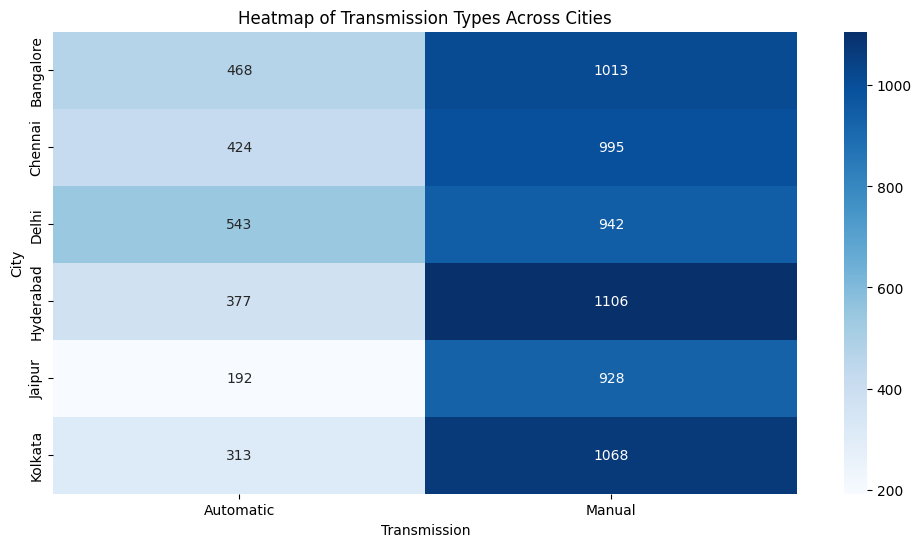

In [46]:
# Create a contingency table
city_transmission_ct = pd.crosstab(df['City'], df['Transmission'])

# Plot a heatmap of the contingency table
plt.figure(figsize=(12, 6))
sns.heatmap(city_transmission_ct, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Transmission Types Across Cities')
plt.xlabel('Transmission')
plt.ylabel('City')
plt.show()


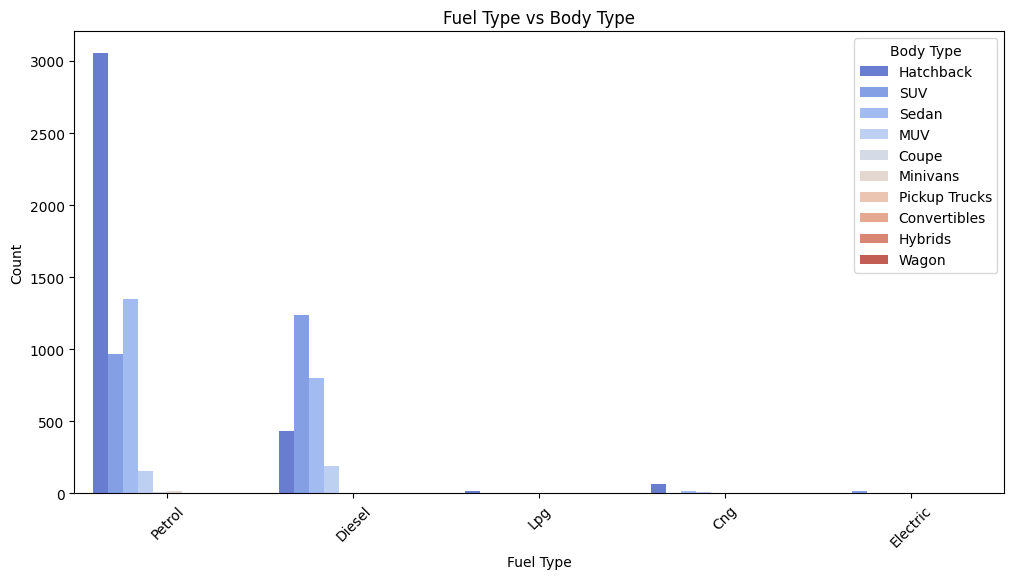

In [47]:
# Fuel vs Body Type

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Fuel Type', hue='Body Type', palette='coolwarm')
plt.title('Fuel Type vs Body Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Body Type')
plt.show()


Outlayer Treatment

In [48]:
# Price (Target) column has lot of outlayer

# Detection

import numpy as np

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers


,City,Fuel Type,Body Type,km,price,ownerNo,Manufacturer,Insurance Validity,Engine Displacement,Transmission,Mileage,Seats,No of Cylinder,Drive Type,Steering Type,No Door Numbers,Year
5,Bangalore,Diesel,SUV,20000,1900000,1,Jeep,Third Party insurance,1956.0,Manual,17.10,5,4,4X2,power,5,1970
16,Bangalore,Diesel,SUV,16000,5595000,1,Mercedes-Benz,Comprehensive,1950.0,Automatic,18.90,5,4,AWD,Power,5,1970
20,Bangalore,Diesel,Sedan,100000,2200000,3,BMW,Third Party insurance,1995.0,Automatic,18.48,5,4,FWD,Power,4,1970
24,Bangalore,Petrol,Sedan,50000,4900000,2,Mercedes-Benz,Third Party insurance,4663.0,Automatic,7.81,5,8,RWD,Power,4,1970
28,Bangalore,Petrol,Sedan,33000,4145000,1,Mercedes-Benz,Comprehensive,1991.0,Automatic,15.00,5,4,RWD,Electric,4,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8280,Kolkata,Diesel,SUV,29000,2250000,1,Jeep,Comprehensive,1956.0,Automatic,14.90,5,4,4x4,Power,5,1970
8281,Kolkata,Diesel,Sedan,23000,2275000,1,BMW,Comprehensive,1995.0,Automatic,22.69,5,4,RWD,Power,4,1970
8290,Kolkata,Diesel,SUV,2000,2370000,1,Mahindra,Comprehensive,2198.0,Automatic,18.90,7,4,2WD,Electric,5,1970
8295,Kolkata,Petrol,SUV,32000,2100000,1,Audi,Comprehensive,1395.0,Automatic,16.90,5,4,FWD,Power,5,1970


In [49]:
# Outlayer Treatment (Capping Technique)

df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])
df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])


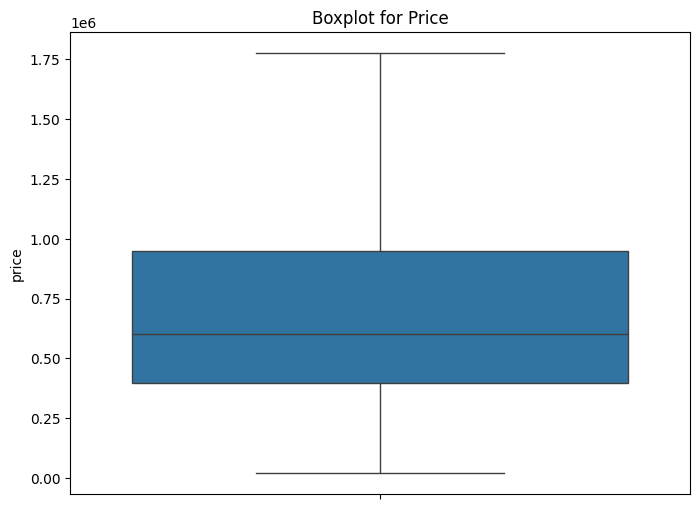

In [50]:
# Boxplot for 'price' to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price'])
plt.title('Boxplot for Price')
plt.show()

In [51]:
# Outlayer Treatment (Capping Technique)

df['Mileage'] = df['Mileage'].replace(110, 35.6)
df['Mileage'] = df['Mileage'].replace(140, 35.6)

In [52]:
# Outlayer Treatment (Capping Technique)

df['No of Cylinder'] = df['No of Cylinder'].replace(23.0, 8.0)

In [53]:
# km (Feature) column has lot of outlayer

# Detection

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km'].quantile(0.25)
Q3 = df['km'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['km'] < lower_bound) | (df['km'] > upper_bound)]
outliers

,City,Fuel Type,Body Type,km,price,ownerNo,Manufacturer,Insurance Validity,Engine Displacement,Transmission,Mileage,Seats,No of Cylinder,Drive Type,Steering Type,No Door Numbers,Year
304,Bangalore,Diesel,SUV,164000,850000.0,2,Mahindra,Comprehensive,2179.0,Manual,15.10,7,4,AWD,Power,5,1970
333,Bangalore,Diesel,SUV,174000,1776500.0,3,Toyota,Comprehensive,2982.0,Automatic,12.55,7,4,FWD,Power,5,1970
336,Bangalore,Diesel,MUV,199000,950000.0,2,Toyota,Comprehensive,2494.0,Manual,12.80,7,4,FWD,Power,5,1970
1230,Bangalore,Diesel,MUV,162000,825000.0,1,Toyota,Comprehensive,2494.0,Manual,12.80,7,4,FWD,Power,5,1970
1234,Bangalore,Diesel,SUV,180000,1195000.0,2,Toyota,Comprehensive,2982.0,Manual,11.50,7,4,4WD,Power,5,1970
1282,Bangalore,Diesel,SUV,174000,1776500.0,1,Toyota,Comprehensive,2755.0,Manual,14.24,7,4,RWD,Power,5,1970
1285,Bangalore,Diesel,SUV,170402,1090000.0,2,Volvo,Comprehensive,2400.0,Automatic,11.10,7,5,AWD,Power,5,1970
1301,Bangalore,Diesel,MUV,157000,1775000.0,2,Toyota,Comprehensive,2393.0,Manual,13.68,8,7,RWD,Power,5,1970
1403,Bangalore,Diesel,MUV,169219,1349000.0,2,Toyota,Third Party insurance,2494.0,Manual,12.99,7,4,FWD,Power,5,1970
1476,Bangalore,Diesel,SUV,156039,1648999.0,2,Toyota,Comprehensive,2982.0,Manual,12.55,7,4,4WD,Power,5,1970


In [54]:
# Outlayer Treatment (Capping Technique)

df['km'] = np.where(df['km'] > upper_bound, upper_bound, df['km'])
df['km'] = np.where(df['km'] < lower_bound, lower_bound, df['km'])


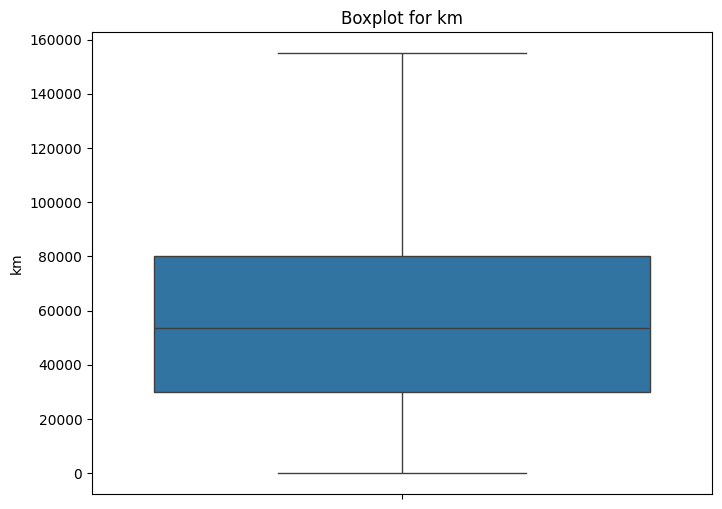

In [55]:
# Boxplot for 'km' to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['km'])
plt.title('Boxplot for km')
plt.show()

Encoding

In [56]:
df

,City,Fuel Type,Body Type,km,price,ownerNo,Manufacturer,Insurance Validity,Engine Displacement,Transmission,Mileage,Seats,No of Cylinder,Drive Type,Steering Type,No Door Numbers,Year
0,Bangalore,Petrol,Hatchback,120000.0,400000.0,3,Maruti,Third Party insurance,998.0,Manual,23.10,5,3,FWD,Power,5,1970
1,Bangalore,Petrol,SUV,32706.0,811000.0,2,Ford,Comprehensive,1497.0,Manual,17.00,5,3,FWD,Power,4,1970
2,Bangalore,Petrol,Hatchback,11949.0,585000.0,1,Tata,Comprehensive,1199.0,Manual,23.84,5,3,FWD,Power,5,1970
3,Bangalore,Petrol,Sedan,17794.0,462000.0,1,Hyundai,Comprehensive,1197.0,Manual,19.10,5,4,FWD,Power,4,1970
4,Bangalore,Diesel,SUV,60000.0,790000.0,1,Maruti,Third Party insurance,1248.0,Manual,23.65,5,4,FWD,Power,5,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,Petrol,Hatchback,10000.0,509999.0,1,Maruti,Third Party insurance,998.0,Manual,25.24,5,3,FWD,Electric,5,1970
8365,Kolkata,Petrol,Hatchback,120000.0,180000.0,1,Maruti,Third Party insurance,796.0,Manual,22.74,5,3,FWD,Power,5,1970
8366,Kolkata,Petrol,Sedan,50000.0,550000.0,3,Mercedes-Benz,Third Party insurance,1796.0,Automatic,11.74,5,4,RWD,Power,4,1970
8367,Kolkata,Petrol,Hatchback,40000.0,140000.0,1,Maruti,Third Party insurance,1197.0,Manual,18.50,5,4,FWD,Power,5,1970


In [57]:
# City (One-hot encoding)

df= pd.get_dummies(df, columns=['City'], dtype=int)


In [58]:
# Fuel (One-hot encoding)

df = pd.get_dummies(df, columns=['Fuel Type'], dtype=int)

In [59]:
# Insurance Validity (One-hot encoding)

df = pd.get_dummies(df, columns=['Insurance Validity'], dtype=int)

In [60]:
# Body Type (One-hot encoding)

df = pd.get_dummies(df, columns=['Body Type'], dtype=int)

In [61]:
# Transmission (One-hot encoding)

df = pd.get_dummies(df, columns=['Transmission'], dtype=int)

In [62]:
# Save column names

city_columns = df.columns[df.columns.str.contains('City')].tolist()
fuel_type_columns = df.columns[df.columns.str.contains('Fuel Type')].tolist()
body_type_columns = df.columns[df.columns.str.contains('Body Type')].tolist()
transmission_columns = df.columns[df.columns.str.contains('Transmission')].tolist()

In [63]:
!pip install category_encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.6 MB/s eta 0:00:00


In [64]:
# Manufacturer (Binary encoding)

# Initialize BinaryEncoder
encoder = ce.BinaryEncoder(cols=['Manufacturer'])

# Apply Binary Encoding ONLY to Manufacturer
df_encoded = encoder.fit_transform(df[['Manufacturer']])  # Ensure only 'Manufacturer' is passed

# Concatenate back with original DataFrame (excluding original Manufacturer)
df = pd.concat([df.drop(columns=['Manufacturer']), df_encoded], axis=1)


Normalizing Numerical Features

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the columns
df[['km', 'Engine Displacement', 'Mileage']] = scaler.fit_transform(df[['km', 'Engine Displacement', 'Mileage']])


Descriptive Statistics

In [66]:
df.describe()

,km,price,ownerNo,Engine Displacement,Mileage,Seats,No of Cylinder,No Door Numbers,Year,City_Bangalore,...,Body Type_Sedan,Body Type_Wagon,Transmission_Automatic,Transmission_Manual,Manufacturer_0,Manufacturer_1,Manufacturer_2,Manufacturer_3,Manufacturer_4,Manufacturer_5
count,8369.000000,8.369000e+03,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.0,8369.000000,...,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000
mean,0.372046,7.489033e+05,1.360139,0.284925,0.425746,5.203131,3.801410,4.686462,1970.0,0.176963,...,0.259768,0.000119,0.276855,0.723145,0.001195,0.106823,0.233003,0.417971,0.309475,0.620743
std,0.218060,4.893771e+05,0.641958,0.095508,0.126566,0.663573,0.557191,0.485359,0.0,0.381660,...,0.438534,0.010931,0.447471,0.447471,0.034549,0.308906,0.422769,0.493255,0.462305,0.485231
min,0.000000,2.016100e+04,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1970.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.193548,3.990000e+05,1.000000,0.239400,0.348177,5.000000,4.000000,4.000000,1970.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.346400,6.010000e+05,1.000000,0.249600,0.414446,5.000000,4.000000,5.000000,1970.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.516129,9.500000e+05,2.000000,0.299600,0.502104,5.000000,4.000000,5.000000,1970.0,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.776500e+06,5.000000,1.000000,1.000000,10.000000,8.000000,6.000000,1970.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature Selection

In [67]:
df.columns

Index(['km', 'price', 'ownerNo', 'Engine Displacement', 'Mileage', 'Seats',
       'No of Cylinder', 'Drive Type', 'Steering Type', 'No Door Numbers',
       'Year', 'City_Bangalore', 'City_Chennai', 'City_Delhi',
       'City_Hyderabad', 'City_Jaipur', 'City_Kolkata', 'Fuel Type_Cng',
       'Fuel Type_Diesel', 'Fuel Type_Electric', 'Fuel Type_Lpg',
       'Fuel Type_Petrol', 'Insurance Validity_1', 'Insurance Validity_2',
       'Insurance Validity_Comprehensive', 'Insurance Validity_Not Available',
       'Insurance Validity_Third Party',
       'Insurance Validity_Third Party insurance',
       'Insurance Validity_Zero Dep', 'Body Type_Convertibles',
       'Body Type_Coupe', 'Body Type_Hatchback', 'Body Type_Hybrids',
       'Body Type_MUV', 'Body Type_Minivans', 'Body Type_Pickup Trucks',
       'Body Type_SUV', 'Body Type_Sedan', 'Body Type_Wagon',
       'Transmission_Automatic', 'Transmission_Manual', 'Manufacturer_0',
       'Manufacturer_1', 'Manufacturer_2', 'Manufacturer_3

In [68]:
feature = df[['km', 'ownerNo', 'Manufacturer_0', 'Manufacturer_1', 'Manufacturer_2', 'Manufacturer_3', 'Manufacturer_4', 'Manufacturer_5', 'Engine Displacement', 'Mileage', 'Seats', 'No of Cylinder', 'No Door Numbers', 'City_Bangalore', 'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Jaipur', 'City_Kolkata',
       'Fuel Type_Cng', 'Fuel Type_Diesel', 'Fuel Type_Electric',
       'Fuel Type_Lpg', 'Fuel Type_Petrol', 'Insurance Validity_1',
       'Insurance Validity_2', 'Insurance Validity_Comprehensive',
       'Insurance Validity_Not Available', 'Insurance Validity_Third Party',
       'Insurance Validity_Third Party insurance',
       'Insurance Validity_Zero Dep', 'Body Type_Convertibles',
       'Body Type_Coupe', 'Body Type_Hatchback', 'Body Type_Hybrids',
       'Body Type_MUV', 'Body Type_Minivans', 'Body Type_Pickup Trucks',
       'Body Type_SUV', 'Body Type_Sedan', 'Body Type_Wagon',
       'Transmission_Automatic', 'Transmission_Manual']]
feature.head()

,km,ownerNo,Manufacturer_0,Manufacturer_1,Manufacturer_2,Manufacturer_3,Manufacturer_4,Manufacturer_5,Engine Displacement,Mileage,...,Body Type_Hatchback,Body Type_Hybrids,Body Type_MUV,Body Type_Minivans,Body Type_Pickup Trucks,Body Type_SUV,Body Type_Sedan,Body Type_Wagon,Transmission_Automatic,Transmission_Manual
0,0.774194,3,0,0,0,0,0,1,0.1996,0.561711,...,1,0,0,0,0,0,0,0,0,1
1,0.211006,2,0,0,0,0,1,0,0.2994,0.347826,...,0,0,0,0,0,1,0,0,0,1
2,0.077090,1,0,0,0,0,1,1,0.2398,0.587658,...,1,0,0,0,0,0,0,0,0,1
3,0.114800,1,0,0,0,1,0,0,0.2394,0.421459,...,0,0,0,0,0,0,1,0,0,1
4,0.387097,1,0,0,0,0,0,1,0.2496,0.580996,...,0,0,0,0,0,1,0,0,0,1


In [69]:
target = df['price']
target.head()

,price
0,400000.0
1,811000.0
2,585000.0
3,462000.0
4,790000.0


<ipython-input-70-89e8aa348ee7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


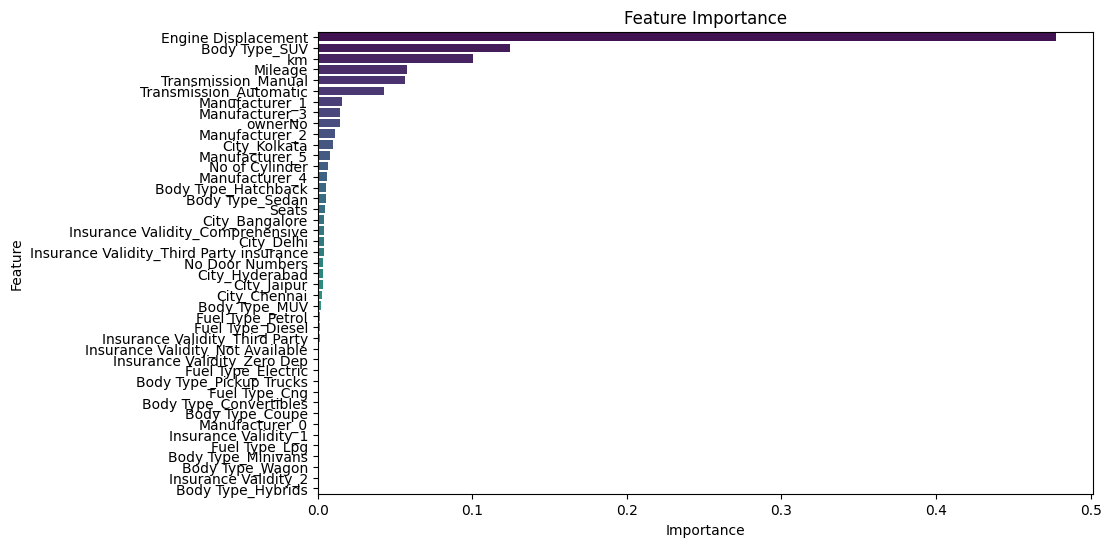

In [70]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define features and target
X = feature  # Features
y = df['price']  # Target variable

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.show()


In [71]:
feature = df[['km', 'ownerNo', 'Manufacturer_0', 'Manufacturer_1', 'Manufacturer_2', 'Manufacturer_3', 'Manufacturer_4', 'Manufacturer_5', 'Engine Displacement', 'Mileage', 'Seats', 'No of Cylinder', 'No Door Numbers', 'City_Bangalore', 'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Jaipur', 'City_Kolkata',
       'Fuel Type_Cng', 'Fuel Type_Diesel', 'Fuel Type_Electric',
       'Fuel Type_Lpg', 'Fuel Type_Petrol', 'Body Type_Convertibles',
       'Body Type_Coupe', 'Body Type_Hatchback', 'Body Type_Hybrids',
       'Body Type_MUV', 'Body Type_Minivans', 'Body Type_Pickup Trucks',
       'Body Type_SUV', 'Body Type_Sedan', 'Body Type_Wagon',
       'Transmission_Automatic', 'Transmission_Manual']]
feature.head()

,km,ownerNo,Manufacturer_0,Manufacturer_1,Manufacturer_2,Manufacturer_3,Manufacturer_4,Manufacturer_5,Engine Displacement,Mileage,...,Body Type_Hatchback,Body Type_Hybrids,Body Type_MUV,Body Type_Minivans,Body Type_Pickup Trucks,Body Type_SUV,Body Type_Sedan,Body Type_Wagon,Transmission_Automatic,Transmission_Manual
0,0.774194,3,0,0,0,0,0,1,0.1996,0.561711,...,1,0,0,0,0,0,0,0,0,1
1,0.211006,2,0,0,0,0,1,0,0.2994,0.347826,...,0,0,0,0,0,1,0,0,0,1
2,0.077090,1,0,0,0,0,1,1,0.2398,0.587658,...,1,0,0,0,0,0,0,0,0,1
3,0.114800,1,0,0,0,1,0,0,0.2394,0.421459,...,0,0,0,0,0,0,1,0,0,1
4,0.387097,1,0,0,0,0,0,1,0.2496,0.580996,...,0,0,0,0,0,1,0,0,0,1


Train and Test data

In [72]:
# Spliting the train and test data

!pip install scikit-learn
from sklearn.model_selection import train_test_split

In [73]:
# Spliting the data

f_train, f_test, t_train, t_test = train_test_split(feature, target, test_size=0.3, random_state=42)


Algorithm Selection & Training

In [74]:
# Package installation

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [75]:
# XGBoost Algorithm

import xgboost as xgb

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=500, max_depth=6, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, min_child_weight=1)

# Train the model
xgb_model.fit(f_train, t_train)

# Make predictions
y_pred = xgb_model.predict(f_test) # Test

x_pred = xgb_model.predict(f_train) # Train

# Evaluate model performance (Test)
mae_test = mean_absolute_error(t_test, y_pred)
mse_test = mean_squared_error(t_test, y_pred)
r2_test = r2_score(t_test, y_pred)

# Evaluate model performance (Train)
mae_train = mean_absolute_error(t_train, x_pred)
mse_train = mean_squared_error(t_train, x_pred)
r2_train = r2_score(t_train, x_pred)

print("Metrics for Test")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R-squared (R²): {r2_test}")

print("Metrics for Train")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"R-squared (R²): {r2_train}")

Metrics for Test
Mean Absolute Error (MAE): 100282.78697869997
Mean Squared Error (MSE): 26481869136.22093
R-squared (R²): 0.8911752438215126
Metrics for Train
Mean Absolute Error (MAE): 57641.98964223605
Mean Squared Error (MSE): 6296207925.954418
R-squared (R²): 0.9735175331776165


Save the Model

In [76]:
import joblib

# Save the trained model
joblib.dump(xgb_model, 'car_price_xgb_model.pkl')

# Save MinMaxScaler
joblib.dump(scaler, "scaler.joblib")

# Save the Binary Encoder
joblib.dump(encoder, 'binary_encoder.joblib')

# Save the column mappings for each encoding
joblib.dump(city_columns, 'city_columns_mapping.joblib')
joblib.dump(fuel_type_columns, 'fuel_type_columns_mapping.joblib')
joblib.dump(body_type_columns, 'body_type_columns_mapping.joblib')
joblib.dump(transmission_columns, 'transmission_columns_mapping.joblib')

print("✅ Model saved successfully!")


✅ Model saved successfully!


Streamlit  Application

In [77]:
from google.colab import files

code = '''
import streamlit as st
import pickle
import joblib
import numpy as np
import pandas as pd

# Load trained model
with open("car_price_xgb_model.pkl", "rb") as file:
    model = pickle.load(file)

# Load the saved binary encoder
encoder = joblib.load("binary_encoder.joblib")

# Load the column mappings for one-hot encoding
city_columns = joblib.load('city_columns_mapping.joblib')
fuel_type_columns = joblib.load('fuel_type_columns_mapping.joblib')
body_type_columns = joblib.load('body_type_columns_mapping.joblib')
transmission_columns = joblib.load('transmission_columns_mapping.joblib')

# Load the minmax scalar
minmax_scaler = joblib.load("scaler.joblib")

# Streamlit UI with background and custom CSS
st.markdown(
    """
    <style>
    .stApp {
        background-image: url('https://s3.easternpeak.com/wp-content/uploads/2023/03/Top-Car-App-Ideas-for-the-Automotive-Industry1.jpg');
        background-size: cover;
        background-position: center;
    }
    .stTitle {
        font-family: 'Comic Sans MS', cursive, sans-serif;
        color: white;
        font-size: 40px;
        font-weight: bold;
        text-align: center;
        margin-top: 30px;
    }
    .stSelectbox, .stNumberInput {
        margin: 10px 0;
        font-size: 16px;
        color: white;
    }
    .stButton>button {
        background-color: #FF5733;
        color: white;
        font-size: 18px;
        padding: 10px;
        border-radius: 5px;
    }
    .stButton>button:hover {
        background-color: #C70039;
    }
    /* Styling for all input labels (headings) */
    label {
        color: white !important;
        font-size: 18px;
        font-weight: bold;
    }
    /* Custom styling for st.success */
    .st-alert-success {
        background-color: white;
        color: black;
    }
    </style>
    """, unsafe_allow_html=True)

# Header with title using HTML for custom styling
st.markdown("<h1 class='stTitle' style='color: white;'>Car Price Prediction</h1>", unsafe_allow_html=True)

# User input fields with better style and spacing
km = st.number_input("Kilometers Driven", min_value=0, max_value=155000, value=0, step=500)
ownerNo = st.number_input("Number of Owners", min_value=0, max_value=5, value=1, step=1)
manufacturer = st.selectbox("Manufacturer", ['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda', 'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota', 'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan', 'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover', 'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu', 'Lexus', 'Porsche', 'Hindustan Motors'])
engine_displacement = st.number_input("Engine Displacement (cc)", min_value=500, max_value=5000, value=500, step=100)
mileage = st.number_input("Mileage (kmpl)", min_value=5.0, max_value=35.5, value=5.0, step=1.0)
seats = st.selectbox("Number of Seats", [2, 4, 5, 6, 7, 8, 9, 10])
no_of_cylinders = st.selectbox("Number of Cylinders", [2, 3, 4, 5, 6, 7, 8])
no_of_doors = st.selectbox("Number of Doors", [2, 3, 4, 5, 6])

city = st.selectbox("City", ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Kolkata'])
fuel_type = st.selectbox("Fuel Type", ['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric'])
body_type = st.selectbox("Body Type", ['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans', 'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'])
transmission = st.selectbox("Transmission", ['Automatic', 'Manual'])

# Function to apply one-hot encoding to input data during prediction
def apply_one_hot_encoding(input_data):
    input_data = pd.get_dummies(input_data, columns=['City', 'Fuel Type', 'Body Type', 'Transmission'], dtype=int)
    expected_columns = city_columns + fuel_type_columns + body_type_columns + transmission_columns
    input_data = input_data.reindex(columns=expected_columns, fill_value=0)
    return input_data

# Convert input into a DataFrame before encoding
manufacturer_input = pd.DataFrame({'Manufacturer': [manufacturer]})

# Apply the SAME encoder used during training
manufacturer_encoded = encoder.transform(manufacturer_input)

# Ensure the encoded data has the expected columns
expected_binary_columns = ['Manufacturer_0', 'Manufacturer_1', 'Manufacturer_2', 'Manufacturer_3', 'Manufacturer_4', 'Manufacturer_5']
manufacturer_encoded = manufacturer_encoded.reindex(columns=expected_binary_columns, fill_value=0)

# Convert to list for model input
manufacturer_encoded = manufacturer_encoded.values.flatten().tolist()

# Prepare categorical input for encoding
categorical_data = pd.DataFrame({'City': [city], 'Fuel Type': [fuel_type], 'Body Type': [body_type], 'Transmission': [transmission]})

# Apply one-hot encoding to categorical data
one_hot_encoded = apply_one_hot_encoding(categorical_data).values.flatten().tolist()

# Normalize numerical features using MinMaxScaler
numerical_data = np.array([[km, engine_displacement, mileage]])
normalized_numerical = minmax_scaler.transform(numerical_data).flatten().tolist()

# Combine all features
input_features = normalized_numerical + [ownerNo] + manufacturer_encoded + [seats, no_of_cylinders, no_of_doors] + one_hot_encoded

print("Feature vector length:", len(input_features))  # Debugging step

# Predict button
if st.button("Predict Car Price"):
    input_array = np.array(input_features)
    print("Input array shape:", input_array.shape)  # Debugging step
    input_array = input_array.reshape(1, -1)
    predicted_price = model.predict(input_array)[0]
    st.success(f"Estimated Car Price: ₹{predicted_price:,.2f}")
'''

with open("app.py", "w") as f:
    f.write(code)

files.download("app.py")  # This will download the file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>